# Business Understanding

Justin Lee

This notebook is for a company named Embraer, a Brazilian airline company that produces private jets in addition to commerical aircrafts, looking to enter the U.S. market by purchasing an aircraft of the lowest potential risk.

Embraer requests that we only analyze accidents or airplanes with a reciprocating engine type that occurred in the United States. The make cannot be an amateur build and Embraer only relies on data with the top ten highest count of sample data. Embraer is not looking to purchase an airplane that is used for commercial enterprises.

# Data Understanding

This data is from the National Transportation Safety Board that includes aviation accident data from 1962 to 2023 about civil aviation accidents and selected incidents in the United States and international waters. Each aviation accident has a unique event ID associated with it and contains additional information in each row from the type of aircraft, the make, the model, and any safety and injury metrics to account for. 

This dataset has 31 columns and 90348 rows. The column datatypes contain 5 floats and 26 objects. For relevance for this project I will clean up the data to include columns worth examining to solve my business understanding problem. 

Some initial limitations in this dataset include missing values, as only the Investigation.Type column contains the full 90348 rows. I will fill these NaN values based off how I see fit. For example, an NaN for an airplane under Number.of.Engines will be replaced with a 1 as airplanes need at least 1 engine and NaN values for injury counts will be filled with 0.0 as this probably means no injuries were reported.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# low_memory=False tells pandas to process the entire input at once resulting in faster processing
df = pd.read_csv('data/Aviation_Data.csv', low_memory=False)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [4]:
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [5]:
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


## Data Preparation

To filter my data to my stakeholder's specific requests, I've narrowed my data down to just airplane accidents with reciprocating engines that were not amateur built that occurred in the United States. Additionally, my stakeholder only trusts data with over 200 counts of sample data. I've narrowed down this as well. This data will help me determine the lowest risk Make for my stakeholder to purchase.

In [6]:
# First I want to examine all columns in the data
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [7]:
# Creating a dataframe that only shows airplane accidents in the United States
df = df[df['Country'] == 'United States']
df['Country'].value_counts()

United States    82248
Name: Country, dtype: int64

In [8]:
# Narrowing the dataframe to show only Accidents
df = df[df['Investigation.Type'] == 'Accident']
df['Investigation.Type'].value_counts()

Accident    79906
Name: Investigation.Type, dtype: int64

In [9]:
# Narrowing the dataframe to show only Airplanes
df = df[df['Aircraft.Category'] == 'Airplane']
df['Aircraft.Category'].value_counts()

Airplane    23659
Name: Aircraft.Category, dtype: int64

In [10]:
# Narrowing the dataframe to show only non-amateur builds
df = df[df['Amateur.Built'] == 'No']
df['Amateur.Built'].value_counts()

No    20564
Name: Amateur.Built, dtype: int64

In [11]:
# Narrowing the dataframe to remove rows where there are no engines present
df = df[df['Number.of.Engines'] != 0.0]
df['Number.of.Engines'].value_counts()

1.0    17554
2.0     2499
4.0       38
3.0       23
6.0        1
8.0        1
Name: Number.of.Engines, dtype: int64

In [12]:
df['Make'].value_counts().head(10)

CESSNA                4211
Cessna                3399
PIPER                 2474
Piper                 1797
BEECH                  872
Beech                  617
BOEING                 228
MOONEY                 215
AIR TRACTOR INC        214
CIRRUS DESIGN CORP     191
Name: Make, dtype: int64

In [13]:
# Make all upper case to account for cases like CESSNA vs Cessna
df['Make'] = df['Make'].str.upper()
df['Make'].value_counts().head(20)

CESSNA                7610
PIPER                 4271
BEECH                 1489
MOONEY                 385
BOEING                 336
BELLANCA               278
GRUMMAN                232
MAULE                  225
AERONCA                224
AIR TRACTOR INC        216
CIRRUS DESIGN CORP     193
AIR TRACTOR            189
CHAMPION               164
LUSCOMBE               162
STINSON                145
NORTH AMERICAN         113
TAYLORCRAFT            109
AERO COMMANDER          95
CIRRUS                  90
DEHAVILLAND             90
Name: Make, dtype: int64

In [14]:
# My stakeholder only trusts the top ten amounts of data
# Even though my stakeholder is not interested in commerical enterprises, we will leave Boeing in this dataset and disregard as a conclusion
top_10_values = df['Make'].value_counts().head(10).index

df = df[df['Make'].isin(top_10_values)]
df['Make'].value_counts()

CESSNA             7610
PIPER              4271
BEECH              1489
MOONEY              385
BOEING              336
BELLANCA            278
GRUMMAN             232
MAULE               225
AERONCA             224
AIR TRACTOR INC     216
Name: Make, dtype: int64

In [15]:
# Narrowing the dataframe to show only reciprocating engine types
df = df[df['Engine.Type'] == 'Reciprocating']
df['Engine.Type'].value_counts()

Reciprocating    13448
Name: Engine.Type, dtype: int64

In [16]:
# I will now remove unwanted columns irrelevant to help me make my conclusion
cols_to_remove = ['Event.Id', 'Accident.Number', 'Event.Date', 'Location', 'Schedule', 'Purpose.of.flight',
                  'Air.carrier', 'Weather.Condition', 'Aircraft.damage','Latitude', 'Longitude', 'Airport.Code',
                  'Airport.Name','Registration.Number', 'FAR.Description', 'Report.Status', 'Publication.Date']
df = df.drop(columns = cols_to_remove)
df.head()

,Investigation.Type,Country,Injury.Severity,Aircraft.Category,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Broad.phase.of.flight
7,Accident,United States,Non-Fatal,Airplane,CESSNA,140,No,1.0,Reciprocating,0.0,0.0,0.0,2.0,Takeoff
8,Accident,United States,Non-Fatal,Airplane,CESSNA,401B,No,2.0,Reciprocating,0.0,0.0,0.0,2.0,Landing
12,Accident,United States,Non-Fatal,Airplane,BELLANCA,17-30A,No,1.0,Reciprocating,0.0,0.0,1.0,0.0,Cruise
13,Accident,United States,Fatal(1),Airplane,CESSNA,R172K,No,1.0,Reciprocating,1.0,0.0,0.0,0.0,Takeoff
15,Accident,United States,Fatal(2),Airplane,BEECH,19,No,1.0,Reciprocating,2.0,0.0,0.0,0.0,Cruise


In [17]:
# Fill NaN values with 0.0 for total fatal/serious/minor and uninjured injuries
df['Total.Fatal.Injuries'] = df['Total.Fatal.Injuries'].fillna(0.0)
df['Total.Serious.Injuries'] = df['Total.Serious.Injuries'].fillna(0.0)
df['Total.Minor.Injuries'] = df['Total.Minor.Injuries'].fillna(0.0)
df['Total.Uninjured'] = df['Total.Uninjured'].fillna(0.0)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13448 entries, 7 to 90120
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Investigation.Type      13448 non-null  object 
 1   Country                 13448 non-null  object 
 2   Injury.Severity         13438 non-null  object 
 3   Aircraft.Category       13448 non-null  object 
 4   Make                    13448 non-null  object 
 5   Model                   13448 non-null  object 
 6   Amateur.Built           13448 non-null  object 
 7   Number.of.Engines       13320 non-null  float64
 8   Engine.Type             13448 non-null  object 
 9   Total.Fatal.Injuries    13448 non-null  float64
 10  Total.Serious.Injuries  13448 non-null  float64
 11  Total.Minor.Injuries    13448 non-null  float64
 12  Total.Uninjured         13448 non-null  float64
 13  Broad.phase.of.flight   4514 non-null   object 
dtypes: float64(5), object(9)
memory usage:

# Exploratory Data Analysis

Determining the lowest risk Make can be best determined by analyzing the average number of engines per Make (typically a higher number of engines correlates to a lower risk), the average number of fatal injuries per Make accident, the average number of serious injuries per Make accident, the average number of minor injuries per Make accident, and the average number of uninjured per Make accident. The following visualizations depict the Makes with over 200 rows of accident data in relation to each category being compared.

### Plot of Average Number of Engines per Make

Embraer only trusts Makes with more than one engine on average. From this graph we can see that Cessna, Beech, Grumman, Piper and Boeing average more than one engine. We can disregard Boeing as Embraer is only interested in private enterprise Makes.

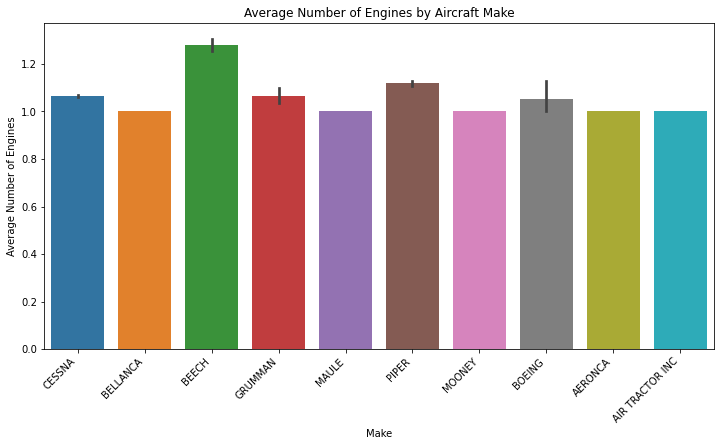

In [18]:
# Plot number of engines per make
plt.figure(figsize=(12, 6))

sns.barplot(x='Make', y='Number.of.Engines', data=df)

plt.title('Average Number of Engines by Aircraft Make')
plt.xlabel('Make')
plt.ylabel('Average Number of Engines')

plt.xticks(rotation=45, ha='right')

plt.show()

### Plots of Average Injuries per Make

Of the four makes average more than one engine, the Beech Make has the highest on average fatal injuries reported. Outside of the engine count, the Mooney Make is showing the second highest on average fatal injuries reported.

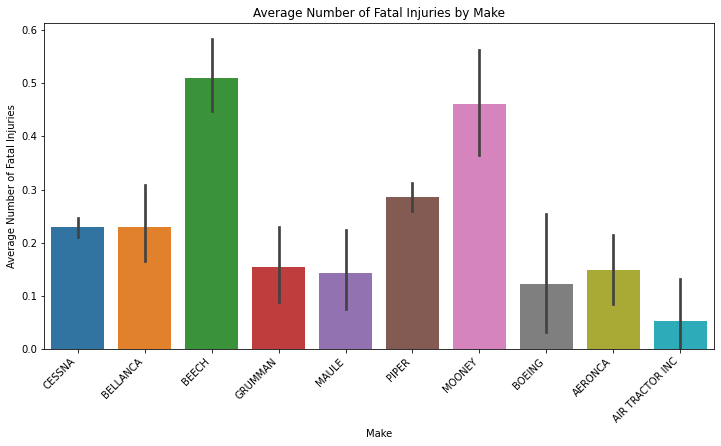

In [19]:
# Plot average total fatal injuries per make
plt.figure(figsize=(12, 6))

sns.barplot(x='Make', y='Total.Fatal.Injuries', data=df)

plt.title('Average Number of Fatal Injuries by Make')
plt.xlabel('Make')
plt.ylabel('Average Number of Fatal Injuries')

plt.xticks(rotation=45, ha='right')

plt.show()

Of the four Makes averaging more than one engine, Cessnas reported the lowest average serious injury count. The Grumman Make reported the highest average count and had the largest interquartile range. Following the Grumman Make in average serious injury counts were the Aeronica and Mooney Makes.

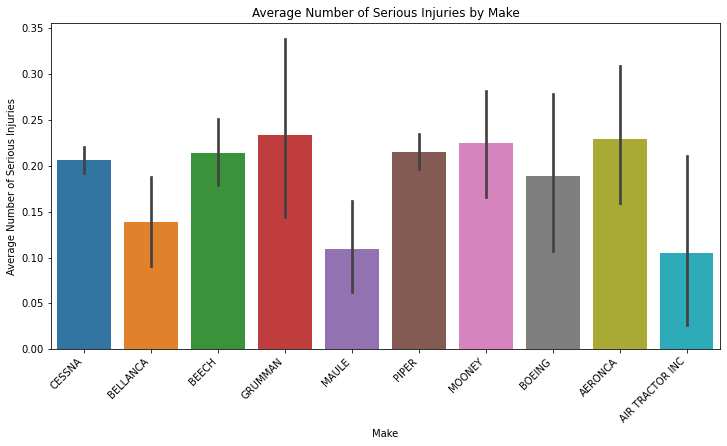

In [20]:
# Plot average total serious injuries per make
plt.figure(figsize=(12, 6))

sns.barplot(x='Make', y='Total.Serious.Injuries', data=df)

plt.title('Average Number of Serious Injuries by Make')
plt.xlabel('Make')
plt.ylabel('Average Number of Serious Injuries')

plt.xticks(rotation=45, ha='right')

plt.show()

Besides the Maule Make, which averages one engine, the Cessna had the lowest on average minor injury count. The Mooney Make had the highest on average count, followed by the Grumman and the Aeronica Makes.

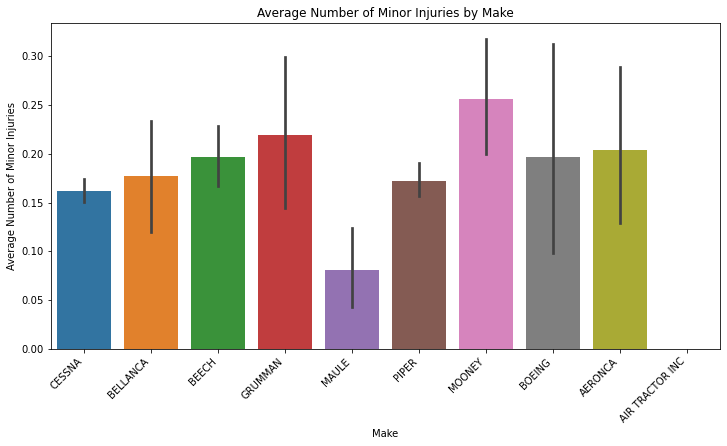

In [21]:
# Plot average total minor injuries per make
plt.figure(figsize=(12, 6))

sns.barplot(x='Make', y='Total.Minor.Injuries', data=df)

plt.title('Average Number of Minor Injuries by Make')
plt.xlabel('Make')
plt.ylabel('Average Number of Minor Injuries')

plt.xticks(rotation=45, ha='right')

plt.show()

Of the Makes reporting on average higher than one number of engines on average and disregarding Boeing, Cessna had the highest on average uninjured passengers per accident while the Grumman Make had the lowest on average uninjured.

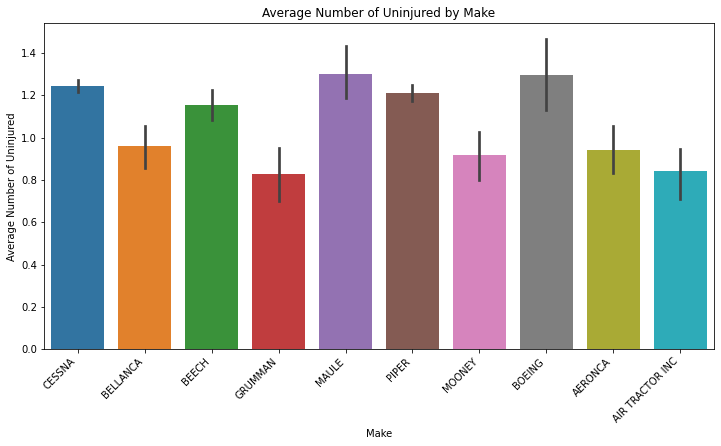

In [22]:
# Plot average total uninjured per make
plt.figure(figsize=(12, 6))

sns.barplot(x='Make', y='Total.Uninjured', data=df)

plt.title('Average Number of Uninjured by Make')
plt.xlabel('Make')
plt.ylabel('Average Number of Uninjured')

plt.xticks(rotation=45, ha='right')

plt.show()

The Cessna Make is the lowest risk Make of the Makes average more than one engine. Although the Cessna has a higher average fatal injury count than the Grumman, it is a lower risk than the Grumman when measured against average serious injury, average minor injury and average uninjured.

We will now filter for just a Cessna Make dataframe to analyze how many engines would be be the lowest risk and which model is the lowest risk.

In [23]:
# Create a dataframe for just CESSNA
df_cessna = df[df['Make'] == 'CESSNA']
df_cessna['Make'].value_counts()

CESSNA    6947
Name: Make, dtype: int64

In [24]:
# Stakeholder is only interested in top 10 data counts
top_10_values_2 = df_cessna['Model'].value_counts().head(10).index

df_cessna = df[df['Model'].isin(top_10_values_2)]
df_cessna['Model'].value_counts()

172     717
152     406
172N    293
182     268
172S    252
180     227
150     210
172M    198
172P    155
140     119
Name: Model, dtype: int64

### Plot of Average Number of Engines by Cessna Model

Of the top ten data counts for Cessna Models, only two models average more than one engine. These two models can be shown below as the 140 and the 150. I would advise Embraer to purchase a Cessna Make of more than one engine as it correlates with lower risk.

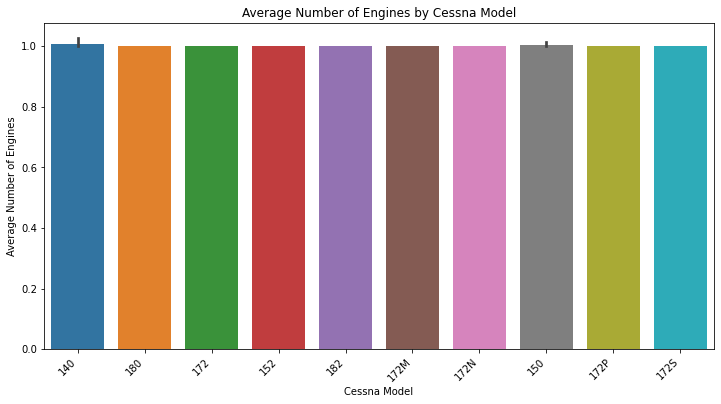

In [25]:
# Plot number of engines by Cessna model
plt.figure(figsize=(12, 6))

sns.barplot(x='Model', y='Number.of.Engines', data=df_cessna)

plt.title('Average Number of Engines by Cessna Model')
plt.xlabel('Cessna Model')
plt.ylabel('Average Number of Engines')

plt.xticks(rotation=45, ha='right')

plt.show()

In [26]:
filtered_df = df_cessna[df_cessna['Number.of.Engines'] > 1.0]

# Display the head of the filtered DataFrame
filtered_df.head()

,Investigation.Type,Country,Injury.Severity,Aircraft.Category,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Broad.phase.of.flight
878,Accident,United States,Non-Fatal,Airplane,CESSNA,150,No,2.0,Reciprocating,0.0,0.0,0.0,2.0,Takeoff
1475,Accident,United States,Non-Fatal,Airplane,CESSNA,140,No,2.0,Reciprocating,0.0,0.0,0.0,1.0,Landing


In [27]:
# Calculate the average number of fatal injuries for models with more than 1 engine
average_fatal_injuries_above_1_engine = df_cessna[df_cessna['Number.of.Engines'] > 1]['Total.Fatal.Injuries'].mean()

# Calculate the average number of fatal injuries for models with 1 or fewer engines
average_fatal_injuries_below_or_equal_1_engine = df_cessna[df_cessna['Number.of.Engines'] <= 1]['Total.Fatal.Injuries'].mean()

print("Average number of fatal injuries for models with more than 1 engine:", average_fatal_injuries_above_1_engine)
print("Average number of fatal injuries for models with 1 or fewer engines:", average_fatal_injuries_below_or_equal_1_engine)

Average number of fatal injuries for models with more than 1 engine: 0.0
Average number of fatal injuries for models with 1 or fewer engines: 0.17535211267605633


Althought there are only two rows of data for Cessna models with more than one engine, both showcase no fatal, serious or minor injuries. Both the 140 and 150 showcase only uninjured passengers. The average number of fatal injuries for models with more than one engine is 0 whereas the average number of fatal injuries for models with 1 or fewer engines is 0.175.

### Plots of Average Injuries per Model

In this plot of average total fatal injuries per Cessna Model, the 182, 172M and 172N record the highest on average fatal injuries. The 180, 152 and 140 Models report the lowest on average fatal injuries.

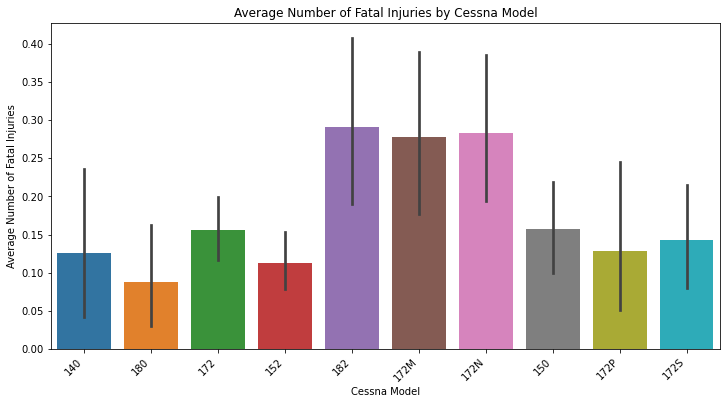

In [28]:
# Plot average total fatal injuries per Cessna model
plt.figure(figsize=(12, 6))

sns.barplot(x='Model', y='Total.Fatal.Injuries', data=df_cessna)

plt.title('Average Number of Fatal Injuries by Cessna Model')
plt.xlabel('Cessna Model')
plt.ylabel('Average Number of Fatal Injuries')

plt.xticks(rotation=45, ha='right')

plt.show()

In the plot below, the 182, 172M and 172 models showcase the highest on average serious injury counts whereas the 152, 172S and 150 models report the lowest on average serious injury counts.

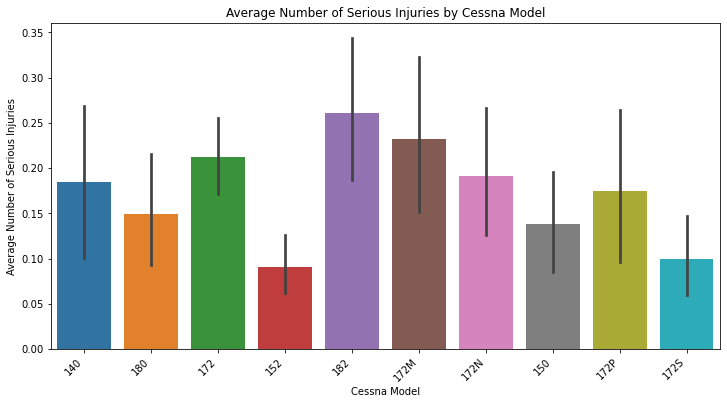

In [29]:
# Plot average total serious injuries per Cessna model
plt.figure(figsize=(12, 6))

sns.barplot(x='Model', y='Total.Serious.Injuries', data=df_cessna)

plt.title('Average Number of Serious Injuries by Cessna Model')
plt.xlabel('Cessna Model')
plt.ylabel('Average Number of Serious Injuries')

plt.xticks(rotation=45, ha='right')

plt.show()

In the plot below, the 150, 172M and 172N models showcase the highest on average minor injury counts whereas the 172S, 140 and 180 models showcase the lowest on average minor injury counts.

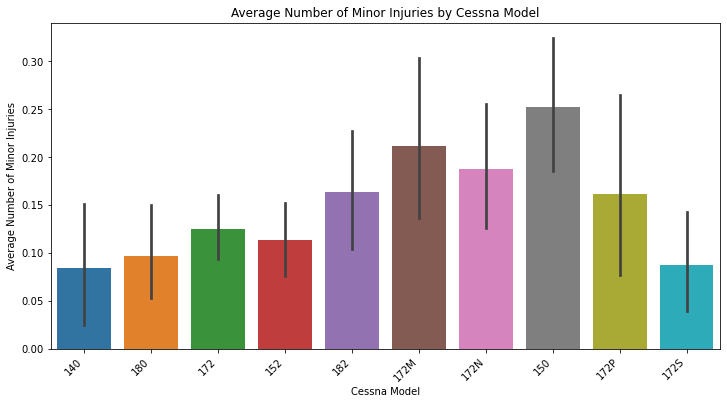

In [30]:
plt.figure(figsize=(12, 6))

sns.barplot(x='Model', y='Total.Minor.Injuries', data=df_cessna)

plt.title('Average Number of Minor Injuries by Cessna Model')
plt.xlabel('Cessna Model')
plt.ylabel('Average Number of Minor Injuries')

plt.xticks(rotation=45, ha='right')

plt.show()

In the plot below, the 180, 172, and 182 models have the highest average number of uninjured passengers whereas the 150, 152 and 172M have the lowest on average uninjured passengers.

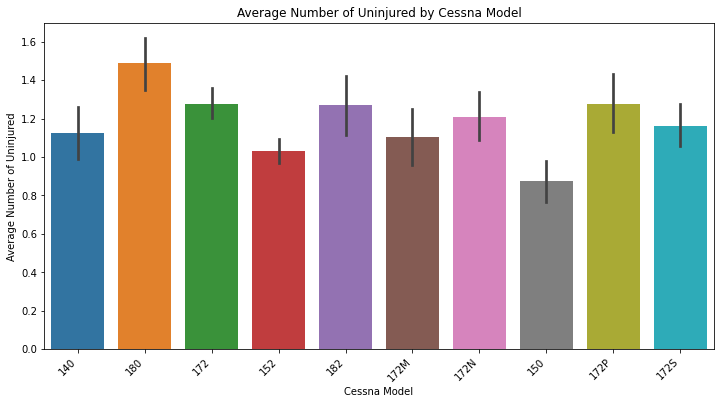

In [31]:
plt.figure(figsize=(12, 6))

sns.barplot(x='Model', y='Total.Uninjured', data=df_cessna)

plt.title('Average Number of Uninjured by Cessna Model')
plt.xlabel('Cessna Model')
plt.ylabel('Average Number of Uninjured')

plt.xticks(rotation=45, ha='right')

plt.show()

Of the two Cessna models that average more than one engine, the 140 averages lower fatal and minor injuries cmopared to the 150 and averages higher uninjured counts than the 150. The 150 showcases a lower average serious injury count than the 140.

The 182, 172M and 172N models are consistently averaging higher injuries in fatal, serious and minor counts compared to other models. The 140, 180 and 152 are consistently averaging lower injuries in fatal, serious and minor injury counts compared to other models.

## Conclusions

This analysis leads to three recommendations for selecting the lowet risk aircraft for Embraer to purhcase

1) The Cessna make. The Cessna make is the lowest risk make averaging more than one engine in the top ten counts of Embraer's analysis criteria when analyzing average injury counts in fatal, serious and minor injuries.

2) Select a Cessna model averaging more than one engine. In looking at the top ten data counts of Cessna models per Embraer's criteria, two models average more than one engine. The 140 and 150. These two models average zero injuries for average fatal, serious and minor injuries. Cessna models with one or fewer engines average 0.175 fatal injuries per Embraer's criteria.

3) Purchase the Cessna 140 model. Now that we've established the higher number of engines is lower risk, the 140 averages a lower risk than the 150 in fatal, minor and uninjured counts. The 150 only averages a lower risk in serious injury counts than the 140 but not by much.

## Limitations

After concluding my analysis, some limitations to this study should be noted.

1) My stakeholder only requested data with the ten highest counts reported. If accidents of other private enterprise Makes were reported in this dataset that also met the other criteria of my stakeholder, we could have had a more in-depth analysis. This dataset was very abundant on the Cessna make compared to other makes we analyzed.

2) This dataset was limited in numerical data to compare amongst each other. Performing a describe action at the start of our analysis showed that only five columns of data were numerical. I utilized all numerical data in my analysis, but more numerical columns could have led to a better analysis.

3) There were a lot of NaN values in this dataset. To account for this, I removed all NaN rows under the Number.of.Engines column and turned all NaN values under the injury columns to 0.0. If these NaN values had reliable data values in place of them at the start, it could have led us to a better analysis.

## Next Steps

Further analysis could yield additional insights to further improve our selection of the lowest risk aircraft:

1) More even distribution of accident reports among the makes present in the data. Some makes accident report sample size far outweighed other makes. This would lead to more reliable data to base our decision off of for one make compared to other makes.

2) Analyzing more numerical data. By analyzing more numerical data, we could create more visualizations and avenues to look into for our analysis. We only have five numerical data columns in this dataset.

3) Working around the missing NaN values. By having a full dataset we could perform a stronger analysis, rather than relying on my intuition on how to account for NaN values in each column.